In [0]:
cd recitation-11/

/content/recitation-11


In [0]:
%matplotlib inline

import torch
import numpy as np
import rbm_demo_utils
import rbm_models

In [0]:
mnist = rbm_demo_utils.MNIST(max_len=2000) # Load MNIST Data

tensor(5)


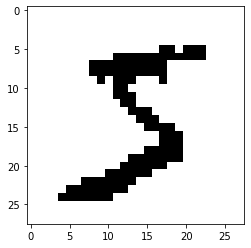

In [0]:
rbm_demo_utils.display_image(mnist[0][0])

# Hopfield Network

In [0]:
net = rbm_models.HopfieldNet(mnist[0][0].size()[0]) # initalized a hopfield net with 784 units (Mnist is 28 x 28)

/content/recitation-11/rbm_models.py:40: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.weights)


In [0]:
trainer = rbm_models.HopfieldTrainWrapper(net, 1) # This is a trainer. the "1" input means to evolve once every iter.

In [0]:
rbm_demo_utils.train([trainer], mnist, rbm_demo_utils.IdentityLoss(), 300, 500, 0.001, 'hopfield')

Loaded checkpoint directly


In [0]:
example = torch.autograd.Variable(mnist[np.random.randint(2000, 60000)][0].unsqueeze(dim=0))
example[0, -10:] = -1
if torch.cuda.is_available():
    net.cuda()
if net.weights.data.is_cuda:
    example = example.cuda()
example_ev = net(example, num_iters=1000)

tensor(9)


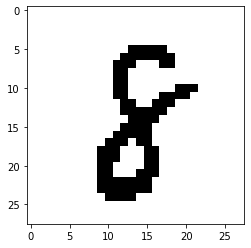

In [0]:
rbm_demo_utils.display_image(example.data[0])

tensor(8)


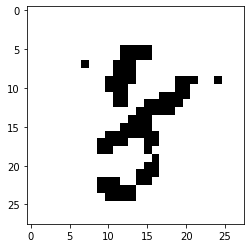

In [0]:
rbm_demo_utils.display_image(example_ev.data[0])

# Stochastic Hopfield Network

In [0]:
net = rbm_models.StochasticHopfieldNet(mnist[0][0].size()[0], temperature=0.1) # initalized a stochastic hopfield net with 784 units (Mnist is 28 x 28)

/content/recitation-11/rbm_models.py:40: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.weights)


In [0]:
trainer = rbm_models.StochasticHopfieldTrainWrapper(net, 3, num_rand_sample_iters=500) # This is a trainer. the "3" input means to evolve once every iter.

In [0]:
rbm_demo_utils.train([trainer], mnist, rbm_demo_utils.IdentityLoss(), 300, 500, 0.001, 'stochastic_hopfield_temp_0_2_evolve_3')

[+][2020-04-04 18:54:10.219539] Training iteration 0 (batch 0 of epoch 0).
Loss: 0.996139
[+][2020-04-04 18:54:10.502094] Training iteration 1 (batch 1 of epoch 0).
Loss: 0.661355
[+][2020-04-04 18:54:10.780805] Training iteration 2 (batch 2 of epoch 0).
Loss: 0.395983
[+][2020-04-04 18:54:11.054001] Training iteration 3 (batch 3 of epoch 0).
Loss: 0.401181
[+][2020-04-04 18:54:11.335444] Training iteration 4 (batch 4 of epoch 0).
Loss: 0.379917
[+][2020-04-04 18:54:11.610491] Training iteration 5 (batch 1 of epoch 1).
Loss: 0.375950
[+][2020-04-04 18:54:11.888452] Training iteration 6 (batch 2 of epoch 1).
Loss: 0.353409
[+][2020-04-04 18:54:12.164994] Training iteration 7 (batch 3 of epoch 1).
Loss: 0.345076
[+][2020-04-04 18:54:12.449457] Training iteration 8 (batch 4 of epoch 1).
Loss: 0.335887
[+][2020-04-04 18:54:12.718290] Training iteration 9 (batch 1 of epoch 2).
Loss: 0.319902
[+][2020-04-04 18:54:13.011382] Training iteration 10 (batch 2 of epoch 2).
Loss: 0.312337
[+][2020-

In [0]:
example = torch.autograd.Variable(mnist[np.random.randint(2000, 60000)][0].unsqueeze(dim=0))
example[0, -10:] = -1
if torch.cuda.is_available():
    net.cuda()
if net.weights.data.is_cuda:
    example = example.cuda()
example_ev = net(example, num_iters=1000)

tensor(0, device='cuda:0')


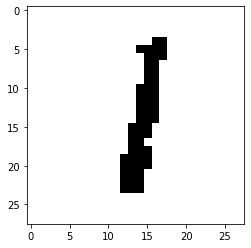

In [0]:
rbm_demo_utils.display_image(example.data[0])

tensor(1, device='cuda:0')


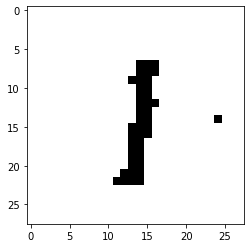

In [0]:
rbm_demo_utils.display_image(example_ev.data[0])

# Restricted Boltzmann Machine

In [0]:
net = rbm_models.RestrictedBoltzmannMachine(mnist[0][0].size()[0], num_hidden=500, temperature=0.2) # initalized a stochastic hopfield net with 784 units (Mnist is 28 x 28)

/content/recitation-11/rbm_models.py:40: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.weights)


In [0]:
trainer = rbm_models.RestrictedBoltzmannTrainWrapper(net, 2) # This is a trainer. the "2" input means to evolve twice every iter.

In [0]:
rbm_demo_utils.train([trainer], mnist, rbm_demo_utils.IdentityLoss(), 200, 500, 0.001, 'RBM')

[+][2020-04-04 19:23:03.211588] Training iteration 0 (batch 0 of epoch 0).
Loss: 0.317889
[+][2020-04-04 19:23:03.363791] Training iteration 1 (batch 1 of epoch 0).
Loss: 0.214412
[+][2020-04-04 19:23:03.496869] Training iteration 2 (batch 2 of epoch 0).
Loss: 0.185198
[+][2020-04-04 19:23:03.622021] Training iteration 3 (batch 3 of epoch 0).
Loss: 0.160867
[+][2020-04-04 19:23:03.750951] Training iteration 4 (batch 4 of epoch 0).
Loss: 0.131180
[+][2020-04-04 19:23:03.876669] Training iteration 5 (batch 1 of epoch 1).
Loss: 0.102567
[+][2020-04-04 19:23:04.003116] Training iteration 6 (batch 2 of epoch 1).
Loss: 0.075920
[+][2020-04-04 19:23:04.129338] Training iteration 7 (batch 3 of epoch 1).
Loss: 0.074035
[+][2020-04-04 19:23:04.256727] Training iteration 8 (batch 4 of epoch 1).
Loss: 0.084652
[+][2020-04-04 19:23:04.379748] Training iteration 9 (batch 1 of epoch 2).
Loss: 0.085117
[+][2020-04-04 19:23:04.507791] Training iteration 10 (batch 2 of epoch 2).
Loss: 0.074456
[+][2020-

In [0]:
example = torch.autograd.Variable(mnist[np.random.randint(2000, 60000)][0].unsqueeze(dim=0))
example[0, -10:] = -1
if torch.cuda.is_available():
    net.cuda()
    example = example.cuda()
expanded = net.expand_data(example)

tensor(0, device='cuda:0')


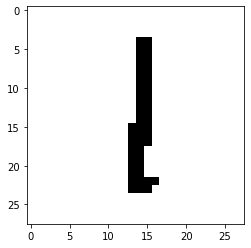

In [0]:
rbm_demo_utils.display_image(example.data[0])

tensor(1, device='cuda:0')


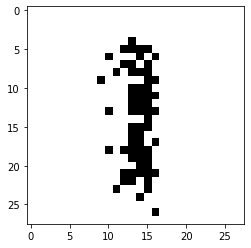

In [0]:
example_ev = net(expanded, num_iters=100)
rbm_demo_utils.display_image(example_ev.data[0][:794])

tensor(1, device='cuda:0')


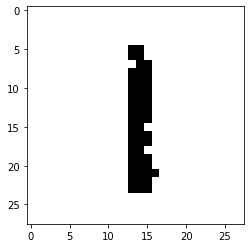

In [0]:
example_ev = net.inference(expanded, num_iters=50, num_inference_iters=100)
rbm_demo_utils.display_image(example_ev.data[0][:794])

In [0]:
example2 = torch.autograd.Variable(mnist[np.random.randint(2000, 60000)][0].unsqueeze(dim=0))
example2[0, -10:] = -1
dropout = torch.nn.Dropout(0.2) # used to mess up the input
# print(example2)
example2_changed = dropout(example2) * (4/5)
example2_changed[example2_changed == 0] = 1
if torch.cuda.is_available():
    net.cuda()
    example2 = example2.cuda()
    example2_changed = example2_changed.cuda()
expanded2 = net.expand_data(example2_changed)

tensor(0, device='cuda:0')


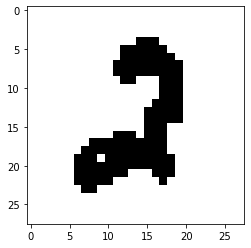

In [0]:
rbm_demo_utils.display_image(example2.data[0])

tensor(5, device='cuda:0')


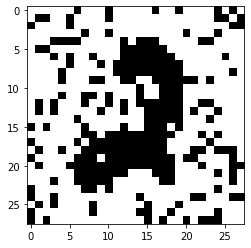

In [0]:
rbm_demo_utils.display_image(example2_changed.data[0])

tensor(2, device='cuda:0')


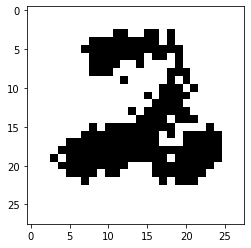

In [0]:
example2_ev = net.inference(expanded2, num_iters=50, num_inference_iters=100)
rbm_demo_utils.display_image(example2_ev.data[0][:794])